### Predicting the prices of Avacados
About the data-

The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [1]:
# display image using python
import IPython

In [2]:
from IPython.display import Image

In [3]:
!pip install pillow

In [4]:
from PIL import Image

In [5]:
image=Image.open(r'C:\Users\USER\Desktop\data analysis by prakash senapathi\august rar files\rarfile\22nd\22nd\RESUME PROJECT -- PRICE PREDICTION\Fruti.JPG')

image.show()

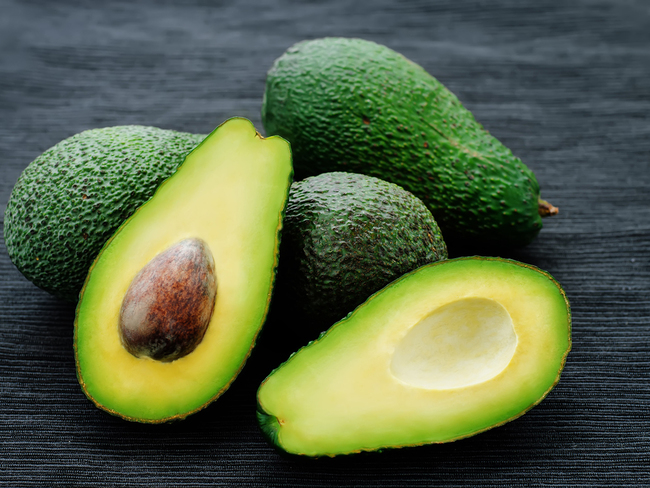

In [6]:
from IPython.display import Image
url=(r'C:\Users\USER\Desktop\data analysis by prakash senapathi\august rar files\rarfile\22nd\22nd\RESUME PROJECT -- PRICE PREDICTION\Fruti.JPG')
Image(url,height=300,width=400)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv(r'C:\Users\USER\Desktop\data analysis by prakash senapathi\august rar files\rarfile\22nd\22nd\RESUME PROJECT -- PRICE PREDICTION\avocado.csv')

In [10]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There are 3 categorical features and luckily no missing value. Let's explore the data further.

<Axes: xlabel='AveragePrice', ylabel='Density'>

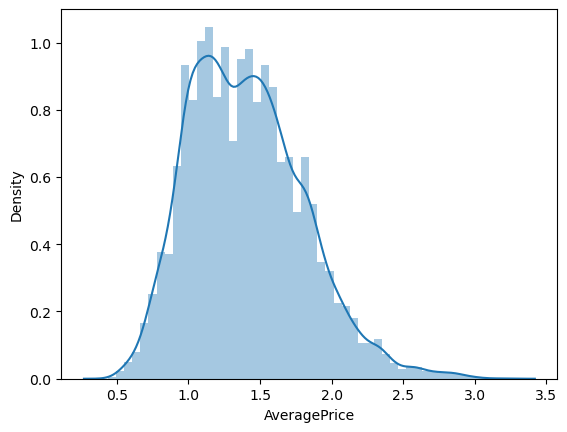

In [12]:
sns.distplot(data['AveragePrice'])

<Axes: xlabel='year', ylabel='count'>

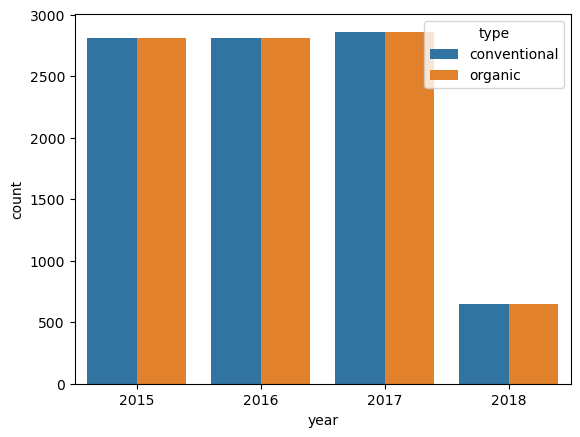

In [13]:
sns.countplot(data=data,x='year',hue='type')

There are almost equal numbers of conventional and organic avacados. Though, there is very less observations in the year 2018.

In [14]:
data['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<Axes: xlabel='type', ylabel='AveragePrice'>

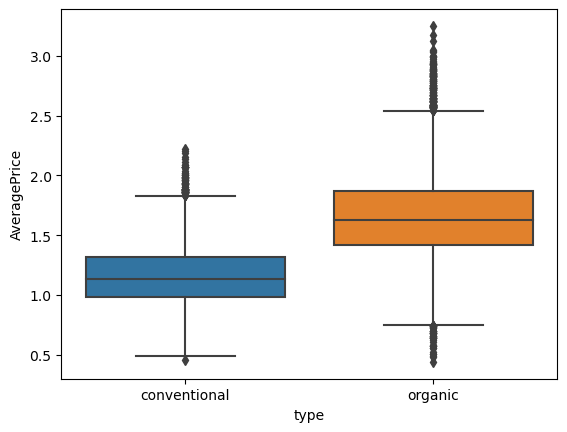

In [15]:
sns.boxplot(x='type',y='AveragePrice',data=data)

Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

<Axes: xlabel='year', ylabel='AveragePrice'>

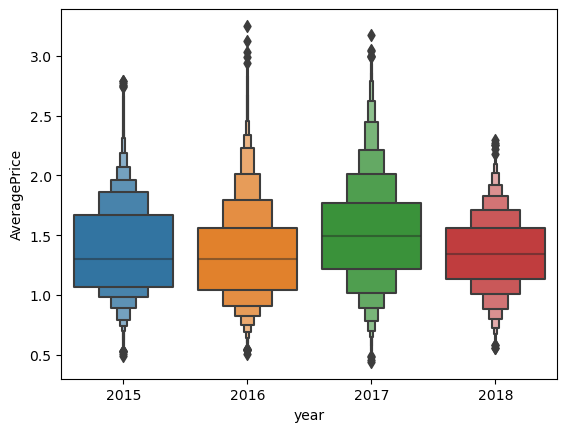

In [16]:
data.year=data.year.apply(str)
sns.boxenplot(data=data,x='year',y='AveragePrice')

Avacados were slightly more expensive in the year 2017.(as there was shortage due to some reasons)

### Dealing with categorical features

In [17]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [18]:
data['type']=data['type'].map({'conventional':0,'organic':1})

In [19]:
# Extracting month from date column.
data.Date=data.Date.apply(pd.to_datetime)
data['month']=data['Date'].apply(lambda x:x.month)
data.month = data.month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [20]:
data['month']

0        DEC
1        DEC
2        DEC
3        DEC
4        NOV
        ... 
18244    FEB
18245    JAN
18246    JAN
18247    JAN
18248    JAN
Name: month, Length: 18249, dtype: object

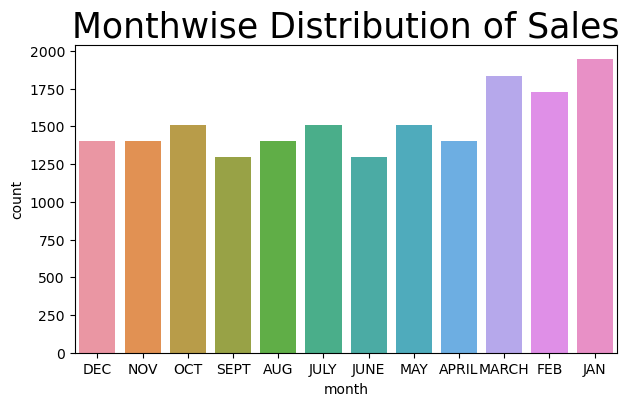

In [21]:
plt.figure(figsize=(7,4))
sns.countplot(data=data,x=data['month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

It implies that sales of avacado see a rise in January, Febuary and March.

In [22]:
# Creating dummy variables
dummies=pd.get_dummies(data[['year','region','month']],drop_first=True)
df_dummies=pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target=data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_dummies,target,test_size=0.3)


In [23]:
# Standardizing the data
col_to_std=['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[col_to_std])
X_train[col_to_std]=scaler.transform(X_train[col_to_std])
X_test[col_to_std]=scaler.transform(X_test[col_to_std])

In [25]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
#to save time all models can be applied once using for loop
regressor= {
    'LinearRegression':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'SupportVecrorMachine':SVR(gamma=1),
    'K-NearestNeighbors':KNeighborsRegressor(n_neighbors=1),
    'xgboost':XGBRegressor()
}
 
result=pd.DataFrame(columns=['MAE','MSE','r2_score']) 
for method,func in regressor.items():
    model=func.fit(X_train,Y_train)
    pred=model.predict(X_test)
    result.loc[method]= [np.round(mean_absolute_error(Y_test,pred),3),
                       np.round(mean_squared_error(Y_test,pred),3),
                       np.round(r2_score(Y_test,pred),3)
                       ]

    

In [27]:
result.sort_values('r2_score',ascending=False)

,MAE,MSE,r2_score
xgboost,0.096,0.017,0.895
RandomForest,0.098,0.020,0.879
K-NearestNeighbors,0.102,0.025,0.847
SupportVecrorMachine,0.120,0.029,0.821
DecisionTree,0.133,0.043,0.740
LinearRegression,0.185,0.060,0.634


Conclusion:


For this dataset, XGBoost and Random Forest algorithms have shown best results.